Problem Statement : 

To predict the CREDIT SCORE of a person based on various factors

Information provided :

Customer_ID Represents a unique identification of a person

SSN Represents the social security number of a person

Occupation Represents the occupation of the person

Monthly_Inhand_Salary represents the monthly base salary of a person

Num_Bank_Accounts Represents the number of bank accounts a person holds

Num_Credit_Card Represents the number of other credit cards held by a person

Interest_Rate Represents the interest rate on credit card

Num_of_Loan Represents the number of loans taken from the bank

Type_of_Loan Represents the types of loan taken by a person

Delay_from_due_date Represents the average number of days delayed from the payment date

Num_of_Delayed_Payment Represents the average number of payments delayed by a person

Changed_Credit_Limit Represents the percentage change in credit card limit

Num_Credit_Inquiries Represents the number of credit card inquiries

Credit_Mix Represents the classification of the mix of credits

Outstanding_Debt Represents the remaining debt to be paid (in USD)

Credit_Utilization_Ratio Represents the utilization ratio of credit card

Credit_History_Age Represents the age of credit history of the person

Payment_of_Min_Amount Represents whether only the minimum amount was paid by the person

Total_EMI_per_month Represents the monthly EMI payments (in USD)

Amount_invested_monthly Represents the monthly amount invested by the customer (in USD)

Payment_Behaviour Represents the payment behavior of the customer (in USD)

Monthly_Balance Represents the monthly balance amount of the customer (in USD)

Credit_Score Represents the bracket of credit score (Poor, Standard, Good)

Loading in necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline 

plt.figure(figsize=(4,4))

''' 
pandas: A library for data manipulation and analysis, providing data structures like DataFrame for handling structured data.
numpy: A library for numerical computations, offering support for arrays and matrices, along with a collection of mathematical functions.
seaborn: A statistical data visualization library based on matplotlib, designed to create informative and attractive graphics.
matplotlib: A plotting library for creating static, interactive, and animated visualizations in Python.

'''


' \npandas: A library for data manipulation and analysis, providing data structures like DataFrame for handling structured data.\nnumpy: A library for numerical computations, offering support for arrays and matrices, along with a collection of mathematical functions.\nseaborn: A statistical data visualization library based on matplotlib, designed to create informative and attractive graphics.\nmatplotlib: A plotting library for creating static, interactive, and animated visualizations in Python.\n\n'

<Figure size 400x400 with 0 Axes>

Reading in the Dataset

In [2]:
df = pd.read_csv("D:/NeoSoft/Credit Score/archive (1)/train.csv")

#In the above command we are setting df to store the data provided in the CSV 
#pd.read_csv is a function in the python library which reads comma seperated values (CSVs)


C:\Users\keena\AppData\Local\Temp\ipykernel_26212\2434571604.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/NeoSoft/Credit Score/archive (1)/train.csv")


Analysing the data

In [3]:
print(df.head(10))

       ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12                    NaN               

In [4]:
print(df.tail())

            ID Customer_ID   Month   Name Age          SSN Occupation  \
99995  0x25fe9  CUS_0x942c   April  Nicks  25  078-73-5990   Mechanic   
99996  0x25fea  CUS_0x942c     May  Nicks  25  078-73-5990   Mechanic   
99997  0x25feb  CUS_0x942c    June  Nicks  25  078-73-5990   Mechanic   
99998  0x25fec  CUS_0x942c    July  Nicks  25  078-73-5990   Mechanic   
99999  0x25fed  CUS_0x942c  August  Nicks  25  078-73-5990   Mechanic   

      Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
99995      39628.99            3359.415833                  4  ...   
99996      39628.99            3359.415833                  4  ...   
99997      39628.99            3359.415833                  4  ...   
99998      39628.99            3359.415833                  4  ...   
99999     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
99995           _            502.38                34.663572   
99996       

In [5]:
df.shape

#This command is used to check the numbers of rows and columns of the data set


(100000, 28)

In [6]:
df.columns.tolist()

#Gives a list of all the columns in the dataset

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [7]:
df.info()

#This command is used to give a quick overview to check if the data has any null values and to check to data types of each individual column 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
df.describe()

#We used this command to check the descriptive statistics of all the NUMERICAL COLUMNS only


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


From the descriptive statistics it can be noted that:
-> Num_Bank_Accounts cannot be -1 it should be lowest as 0 which means bank count not present instead of -1 

-> Num_Bank_Accounts being maxxed at 1798 when 75th percentile is 7 is very unlikely and is either an outlier or wrongly inputed data

-> Num_Credit_Card the max given is 1499 which seems to be wrong as it is not possible to have those many credits cards with the 75th percentile being 7 
   it is either an outlier or wrongly inputed data

-> Interest_Rate generally ranges from 10-35% (Source:Quora) therefore having a max interest rate of 5797 is absurd and should be wrongly inputed data

-> Num_Credit_Inquiries has outliers as the 75th percentile is 9 and the max is 2597 which is too far of a diffference therefore it is either an outlier or wrongly inputed data

-> Total_EMI_per_month has outliers because of the massive spike between the 50th and 75th percentile

-> Total_EMI_per_month has outliers as the 75th percentile is 161 and the max given is 82331 which is too far of a difference so either wrongly inputed data or outlier present

Remarks: 
The data seems to be having alot of outliers or wrongly inputed values in the numerical columns which have to be checked and rectified

In [9]:
df.describe(include = object)

#We used this command to check the descriptive statistics of all the NON NUMERICAL columns only

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


From the above data it can be noted that:

-> ID column has all unique values and therefore can be dropped

-> Customer_ID has 12500 unique values which means the above dataset is about 12500 customers 

-> Months there are 8 unique months which means the data is seasonal 

-> Age is given as an object data type but usually age is a numerical data type 
   Age also has 1788 unique values

-> SSN has #F%$D@*&8 which is wrongly inputed data as ssn is a security number and should be numerical 

-> Occupation has 16 unique values and ______ is not a occupation therefore is is wrongly inputed value 

-> Annual Income should be numerical data type 

-> Num_of_Loan should be numerical data type

-> Num_of_Delayed_Payment should be numerical data type 

-> Outstanding Debt should be numerical data type 

-> Amount_invested_monthly should be numerical data type

-> Changed_Credit_Limit should be numerical data type

-> Monthly_Balance should be numerical data type 
   Monthly balance being __-333333333333333333333333333__ is very unlikely and mostly likely and outlier or wrongly inputed data 

Dealing with datatypes 

In [10]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [11]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['SSN'] = pd.to_numeric(df['Age'], errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Age'], errors='coerce')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

Checking for duplicates and uniques

In [12]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1661
SSN                           1661
Occupation                      16
Annual_Income                13437
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                   1661
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         698
Changed_Credit_Limit          4375
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91048
Payment_Behaviour                7
Monthly_Balance              98791
Credit_Score                     3
dtype: int64

Null Value Treatment 

In [13]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                          4939
SSN                          4939
Occupation                      0
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4939
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

It can be noted that: 

Name

Age

SSN

Annual_Income

Monthly_Inhand_Salary

Num_of_Loan

Type_of_Loan

Num_of_Delayed_Payment

Changed_Credit_Limit

Num_Credit_Inquiries

Outstanding_Debt

Credit_History_Age

Amount_invested_monthly

Monthly_Balance 

All have Null values which have to be dealt with

In [14]:
df.drop('ID' , axis = 1 , inplace = True)

In [15]:
df.drop('Name' ,  axis = 1 , inplace=True)

In [16]:
df.drop('Payment_Behaviour' ,  axis = 1 , inplace=True)

Name column can be dropped as we will be using Customer_ID in this dataset and name and Customer_ID are both the same

In [17]:
df['Age'].describe()

count    95061.000000
mean       110.934505
std        689.407864
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

In [18]:
# Set lower and upper limits for the 'age' column
lower_limit = 18
upper_limit = 80

# Replace values outside the limits with np.nan
df['Age'] = df['Age'].apply(lambda x: x if lower_limit <= x <= upper_limit else np.nan)

In the above code a lower and upper limit has been set lower limit being 18 as the least age to apply and get a credit card is 18 and upper limit is 80

As the average age for having a credit card in the upper limit 70 (Source : HDFC Bank) 

The reason being that an older person is at greater risk for having health issues and even the lack of a regular income post retirement 



In [19]:
df['Age'].describe()

count    86932.000000
mean        34.422779
std         10.113152
min         18.000000
25%         26.000000
50%         34.000000
75%         42.000000
max         56.000000
Name: Age, dtype: float64

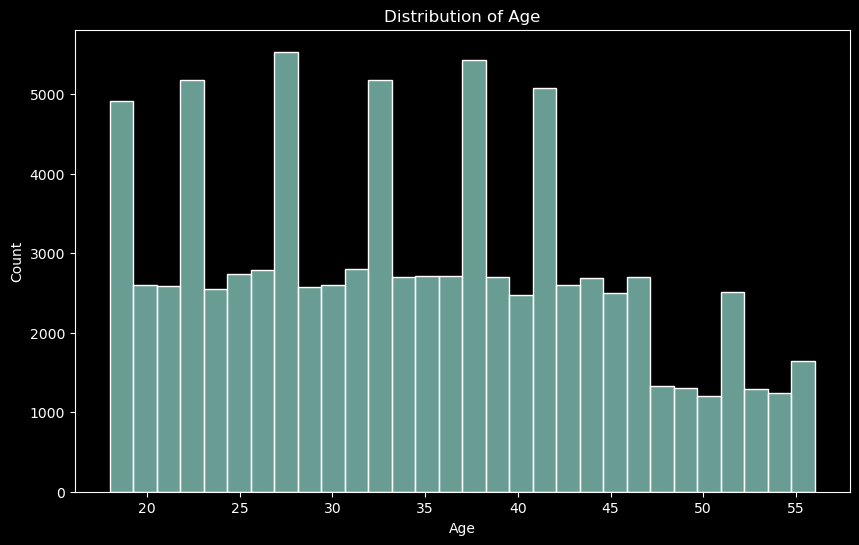

In [20]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30)

# Set the title and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()


In [21]:
df['Age'].isnull().sum()

13068

In [22]:
age_mapping = {}
for index, row in df.iterrows():
    if pd.notnull(row['Age']):
        age_mapping[row['Customer_ID']] = row['Age']

# Fill missing age values using the age_mapping dictionary
for index, row in df.iterrows():
    if pd.isnull(row['Age']):
        if row['Customer_ID'] in age_mapping:
            df.at[index, 'Age'] = age_mapping[row['Customer_ID']]
        else:
            print(f"Warning: No age found for customer_id {row['Customer_ID']}")


Code prompt :

my  Customer_ID is a column which has the Customer_ID of 12500 customers non numeric and no nulls and the Customer_ID are repeating in the data set as the customer reenters his data in different months , I have another column Age which gives me the age of these 12500 customers but some of the rows in the age column are nulls , i want a code that will fill in the rows of the age columns with age correct age value by finding the that Customer_ID of that customer and then find the age of that Customer_ID in which the age is mentioned and input that age for the null value create a for loop which will do this for all the null values in age with different Customer_IDs



In [23]:
df['Age'].isnull().sum()

5512

Since for these the age is not mentioned only anywhere and the nulls are very less they are gonna be dropped

In [24]:
df.isnull().sum()

Customer_ID                     0
Month                           0
Age                          5512
SSN                          4939
Occupation                      0
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4939
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [25]:
df.drop('Credit_History_Age' ,  axis = 1 , inplace=True)

In [26]:
df.drop('SSN' ,  axis = 1 , inplace=True)

We are dropping this column as SSN is sensitive data and is usually not shared and cannot be used without the permission of the card holder

In [27]:
df['Monthly_Inhand_Salary'].describe()

count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

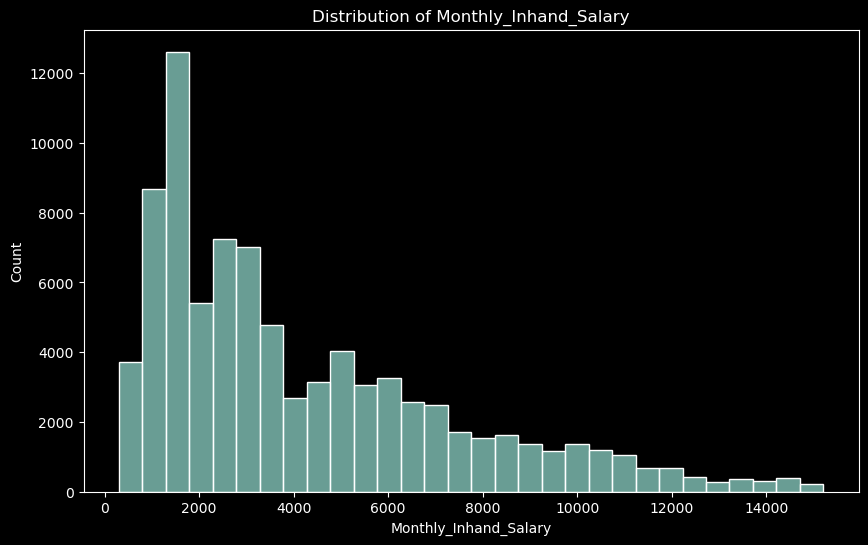

In [28]:
plt.style.use('dark_background')

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly_Inhand_Salary'], bins=30)

# Set the title and labels
plt.title('Distribution of Monthly_Inhand_Salary')
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Count')

# Show the plot
plt.show()

The data is skewed therefored for null treatment it will be imputed by median

In [29]:
Monthly_Inhand_Salary_mapping = {}
for index, row in df.iterrows():
    if pd.notnull(row['Monthly_Inhand_Salary']):
        Monthly_Inhand_Salary_mapping[row['Customer_ID']] = row['Age']

# Fill missing age values using the age_mapping dictionary
for index, row in df.iterrows():
    if pd.isnull(row['Monthly_Inhand_Salary']):
        if row['Customer_ID'] in Monthly_Inhand_Salary_mapping:
            df.at[index, 'Monthly_Inhand_Salary'] = Monthly_Inhand_Salary_mapping[row['Customer_ID']]
        else:
            print(f"Warning: No Monthly_Inhand_Salary found for customer_id {row['Customer_ID']}")

In [30]:
# Calculate the median of the Monthly_Inhand_Salary column
#median_salary = df['Monthly_Inhand_Salary'].median()

# Impute null values in Monthly_Inhand_Salary column with the median
#df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(median_salary)


In [31]:
df['Annual_Income'].describe()

count    9.302000e+04
mean     1.785790e+05
std      1.442878e+06
min      7.005930e+03
25%      1.943560e+04
50%      3.755074e+04
75%      7.284338e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

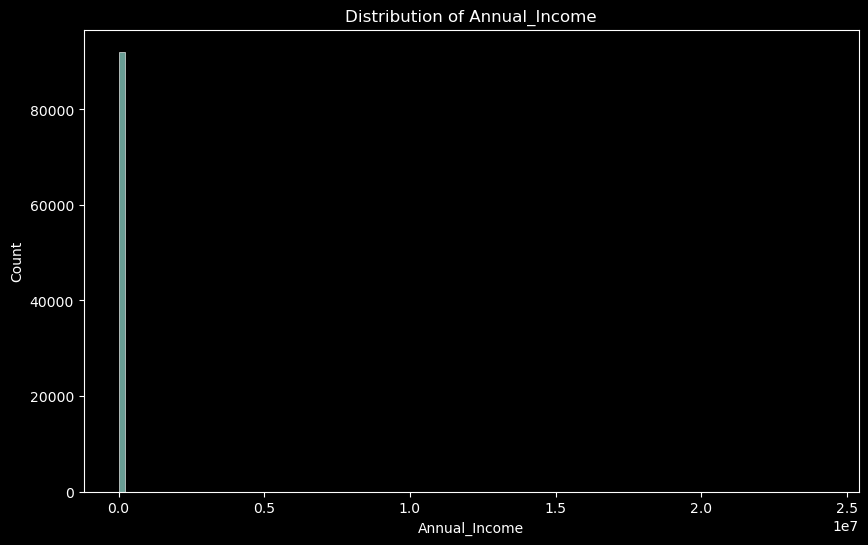

In [32]:
plt.style.use('dark_background')

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual_Income'], bins=120)

# Set the title and labels
plt.title('Distribution of Annual_Income')
plt.xlabel('Annual_Income')
plt.ylabel('Count')

# Show the plot
plt.show()

The data is highly skewed so imputing by median

In [33]:
Annual_Income_mapping = {}
for index, row in df.iterrows():
    if pd.notnull(row['Annual_Income']):
        Annual_Income_mapping[row['Customer_ID']] = row['Annual_Income']

# Fill missing age values using the age_mapping dictionary
for index, row in df.iterrows():
    if pd.isnull(row['Annual_Income']):
        if row['Customer_ID'] in Annual_Income_mapping:
            df.at[index, 'Annual_Income'] = Annual_Income_mapping[row['Customer_ID']]
        else:
            print(f"Warning: No Annual_income found for customer_id {row['Customer_ID']}")

In [34]:
# Calculate the median of the Monthly_Inhand_Salary column
#median_annual_salary = df['Annual_Income'].median()

# Impute null values in Monthly_Inhand_Salary column with the median
#df['Annual_Income'] = df['Annual_Income'].fillna(median_annual_salary)

In [35]:
print(df['Type_of_Loan'].value_counts())

#Non numerical data and 

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, M

In [36]:
df['Num_of_Delayed_Payment'].describe()

count    90254.000000
mean        31.033051
std        226.955758
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [37]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: max(0, x))


In [38]:
df['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         28.018840
std         215.807608
min           0.000000
25%           7.000000
50%          13.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

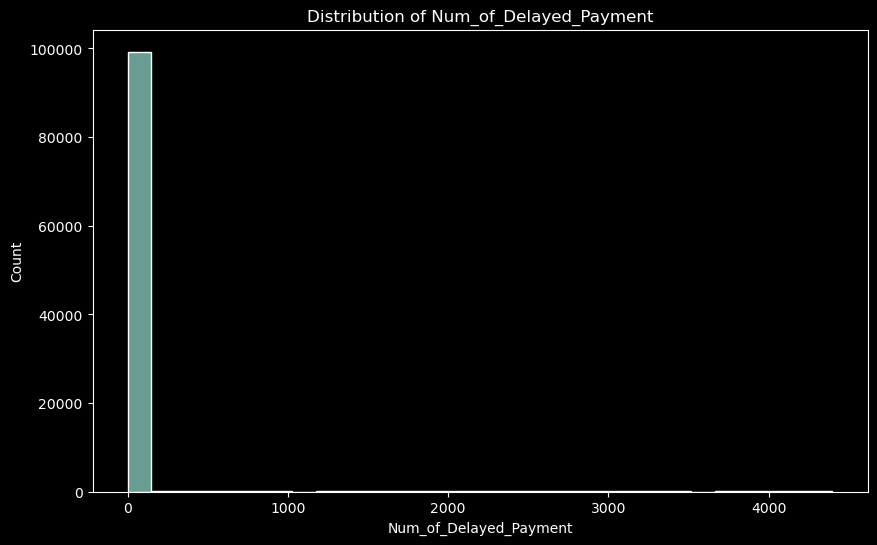

In [39]:
plt.style.use('dark_background')

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Num_of_Delayed_Payment'], bins=30)

# Set the title and labels
plt.title('Distribution of Num_of_Delayed_Payment')
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Count')

# Show the plot
plt.show()

The data is greatly skewed cause of some outliers but since 90% of the data is between 0-200 
Any data above 200 is being capped to 200

In [40]:
lower_limit = 0
upper_limit = 200
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: max(lower_limit, min(upper_limit, x)))


In [41]:
Num_of_Delayed_Payment_mapping = {}
for index, row in df.iterrows():
    if pd.notnull(row['Num_of_Delayed_Payment']):
        Num_of_Delayed_Payment_mapping[row['Customer_ID']] = row['Num_of_Delayed_Payment']

# Fill missing age values using the age_mapping dictionary
for index, row in df.iterrows():
    if pd.isnull(row['Num_of_Delayed_Payment']):
        if row['Customer_ID'] in Num_of_Delayed_Payment_mapping:
            df.at[index, 'Num_of_Delayed_Payment'] = Num_of_Delayed_Payment_mapping[row['Customer_ID']]
        else:
            print(f"Warning: No Num_of_Delayed_Payment found for customer_id {row['Customer_ID']}")

In [42]:
# Calculate the median of the Monthly_Inhand_Salary column
#median_delayed_payment = df['Num_of_Delayed_Payment'].median()

# Impute null values in Monthly_Inhand_Salary column with the median
#df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(median_delayed_payment)

In [43]:
df['Amount_invested_monthly'].describe()

count    91216.000000
mean       195.539456
std        199.564527
min          0.000000
25%         72.236692
50%        128.954538
75%        236.815814
max       1977.326102
Name: Amount_invested_monthly, dtype: float64

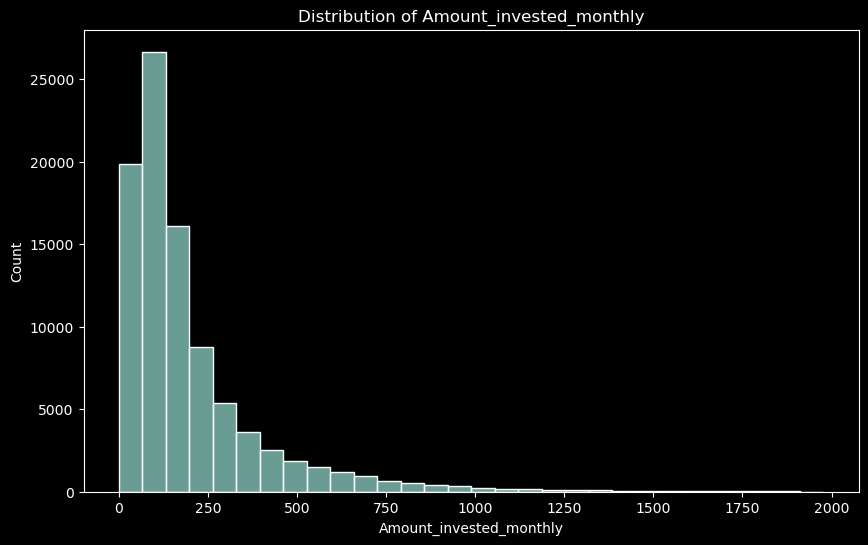

In [44]:
plt.style.use('dark_background')

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount_invested_monthly'], bins=30)

# Set the title and labels
plt.title('Distribution of Amount_invested_monthly')
plt.xlabel('Amount_invested_monthly')
plt.ylabel('Count')

# Show the plot
plt.show()

In [45]:
df.columns.to_list()

['Customer_ID',
 'Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_Score']

It is skewed data


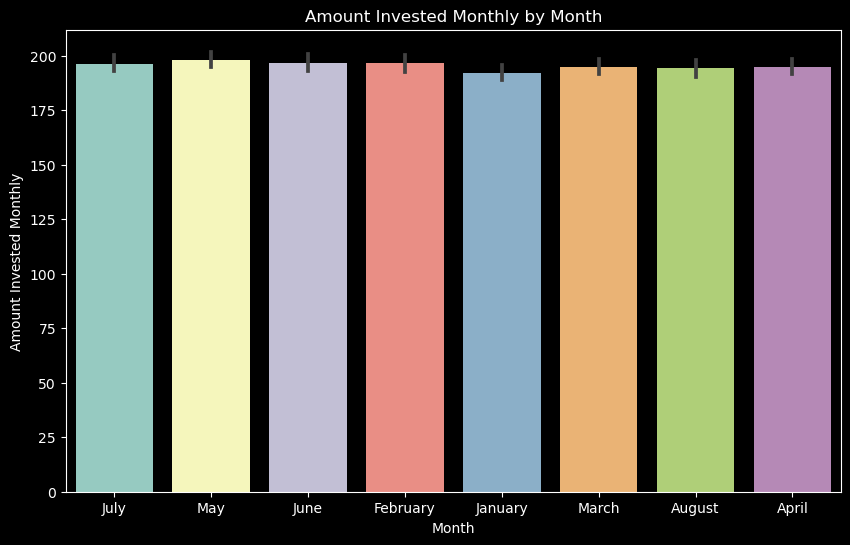

In [46]:
# Sort the DataFrame by Month
sorted_df = df.sort_values(by='Amount_invested_monthly')

# Set a dark background style
plt.style.use('dark_background')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_df, x='Month', y='Amount_invested_monthly')

# Set the title and labels
plt.title('Amount Invested Monthly by Month')
plt.xlabel('Month')
plt.ylabel('Amount Invested Monthly')

# Show the plot
plt.show()


In [47]:
Amount_invested_monthly_mapping = {}
for index, row in df.iterrows():
    if pd.notnull(row['Amount_invested_monthly']):
        Amount_invested_monthly_mapping[row['Customer_ID']] = row['Amount_invested_monthly']

# Fill missing age values using the age_mapping dictionary
for index, row in df.iterrows():
    if pd.isnull(row['Amount_invested_monthly']):
        if row['Customer_ID'] in Amount_invested_monthly_mapping:
            df.at[index, 'Amount_invested_monthly'] = Amount_invested_monthly_mapping[row['Customer_ID']]
        else:
            print(f"Warning: No Amount_invested_monthly found for customer_id {row['Customer_ID']}")

In [48]:
# Calculate the median of the Monthly_Inhand_Salary column
#median_Amount_invested_monthly = df['Amount_invested_monthly'].median()

# Impute null values in Monthly_Inhand_Salary column with the median
#df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(median_Amount_invested_monthly)

In [49]:
df.isnull().sum()

Customer_ID                     0
Month                           0
Age                          5512
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary         860
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4939
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

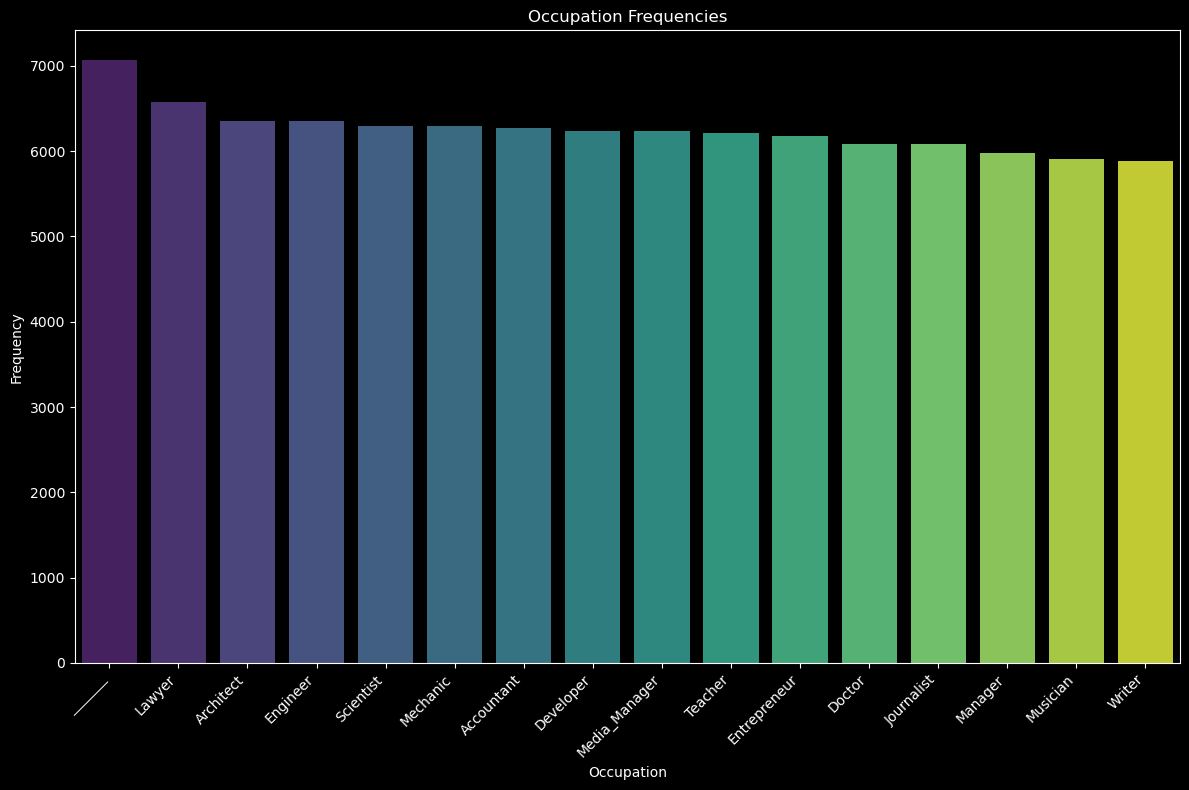

In [50]:
occupation_counts = df['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'frequency']

# Set a dark background style
plt.style.use('dark_background')

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=occupation_counts, x='Occupation', y='frequency', palette='viridis')

# Set the title and labels
plt.title('Occupation Frequencies')
plt.xlabel('Occupation')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Occupations has 15 occupations which are given and '-' which could mean that the person either was unemployed or it could be null values

In [51]:
df['Occupation'] = df['Occupation'].replace('_______', np.nan)

Changing the '__' into null values as there

 values are wrongly labelled as '__'

In [52]:
df['Occupation'].value_counts()

Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [53]:
df['Occupation'].isnull().sum()

7062

In [54]:
occupation_mapping = {}
for index, row in df.iterrows():
    if pd.notnull(row['Occupation']):
        occupation_mapping[row['Customer_ID']] = row['Occupation']

# Fill missing age values using the age_mapping dictionary
for index, row in df.iterrows():
    if pd.isnull(row['Occupation']):
        if row['Customer_ID'] in occupation_mapping:
            df.at[index, 'Occupation'] = occupation_mapping[row['Customer_ID']]
        else:
            print(f"Warning: occupation found for customer_id {row['Customer_ID']}")

In [55]:
df['Occupation'].isnull().sum()

0

c:\Users\keena\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


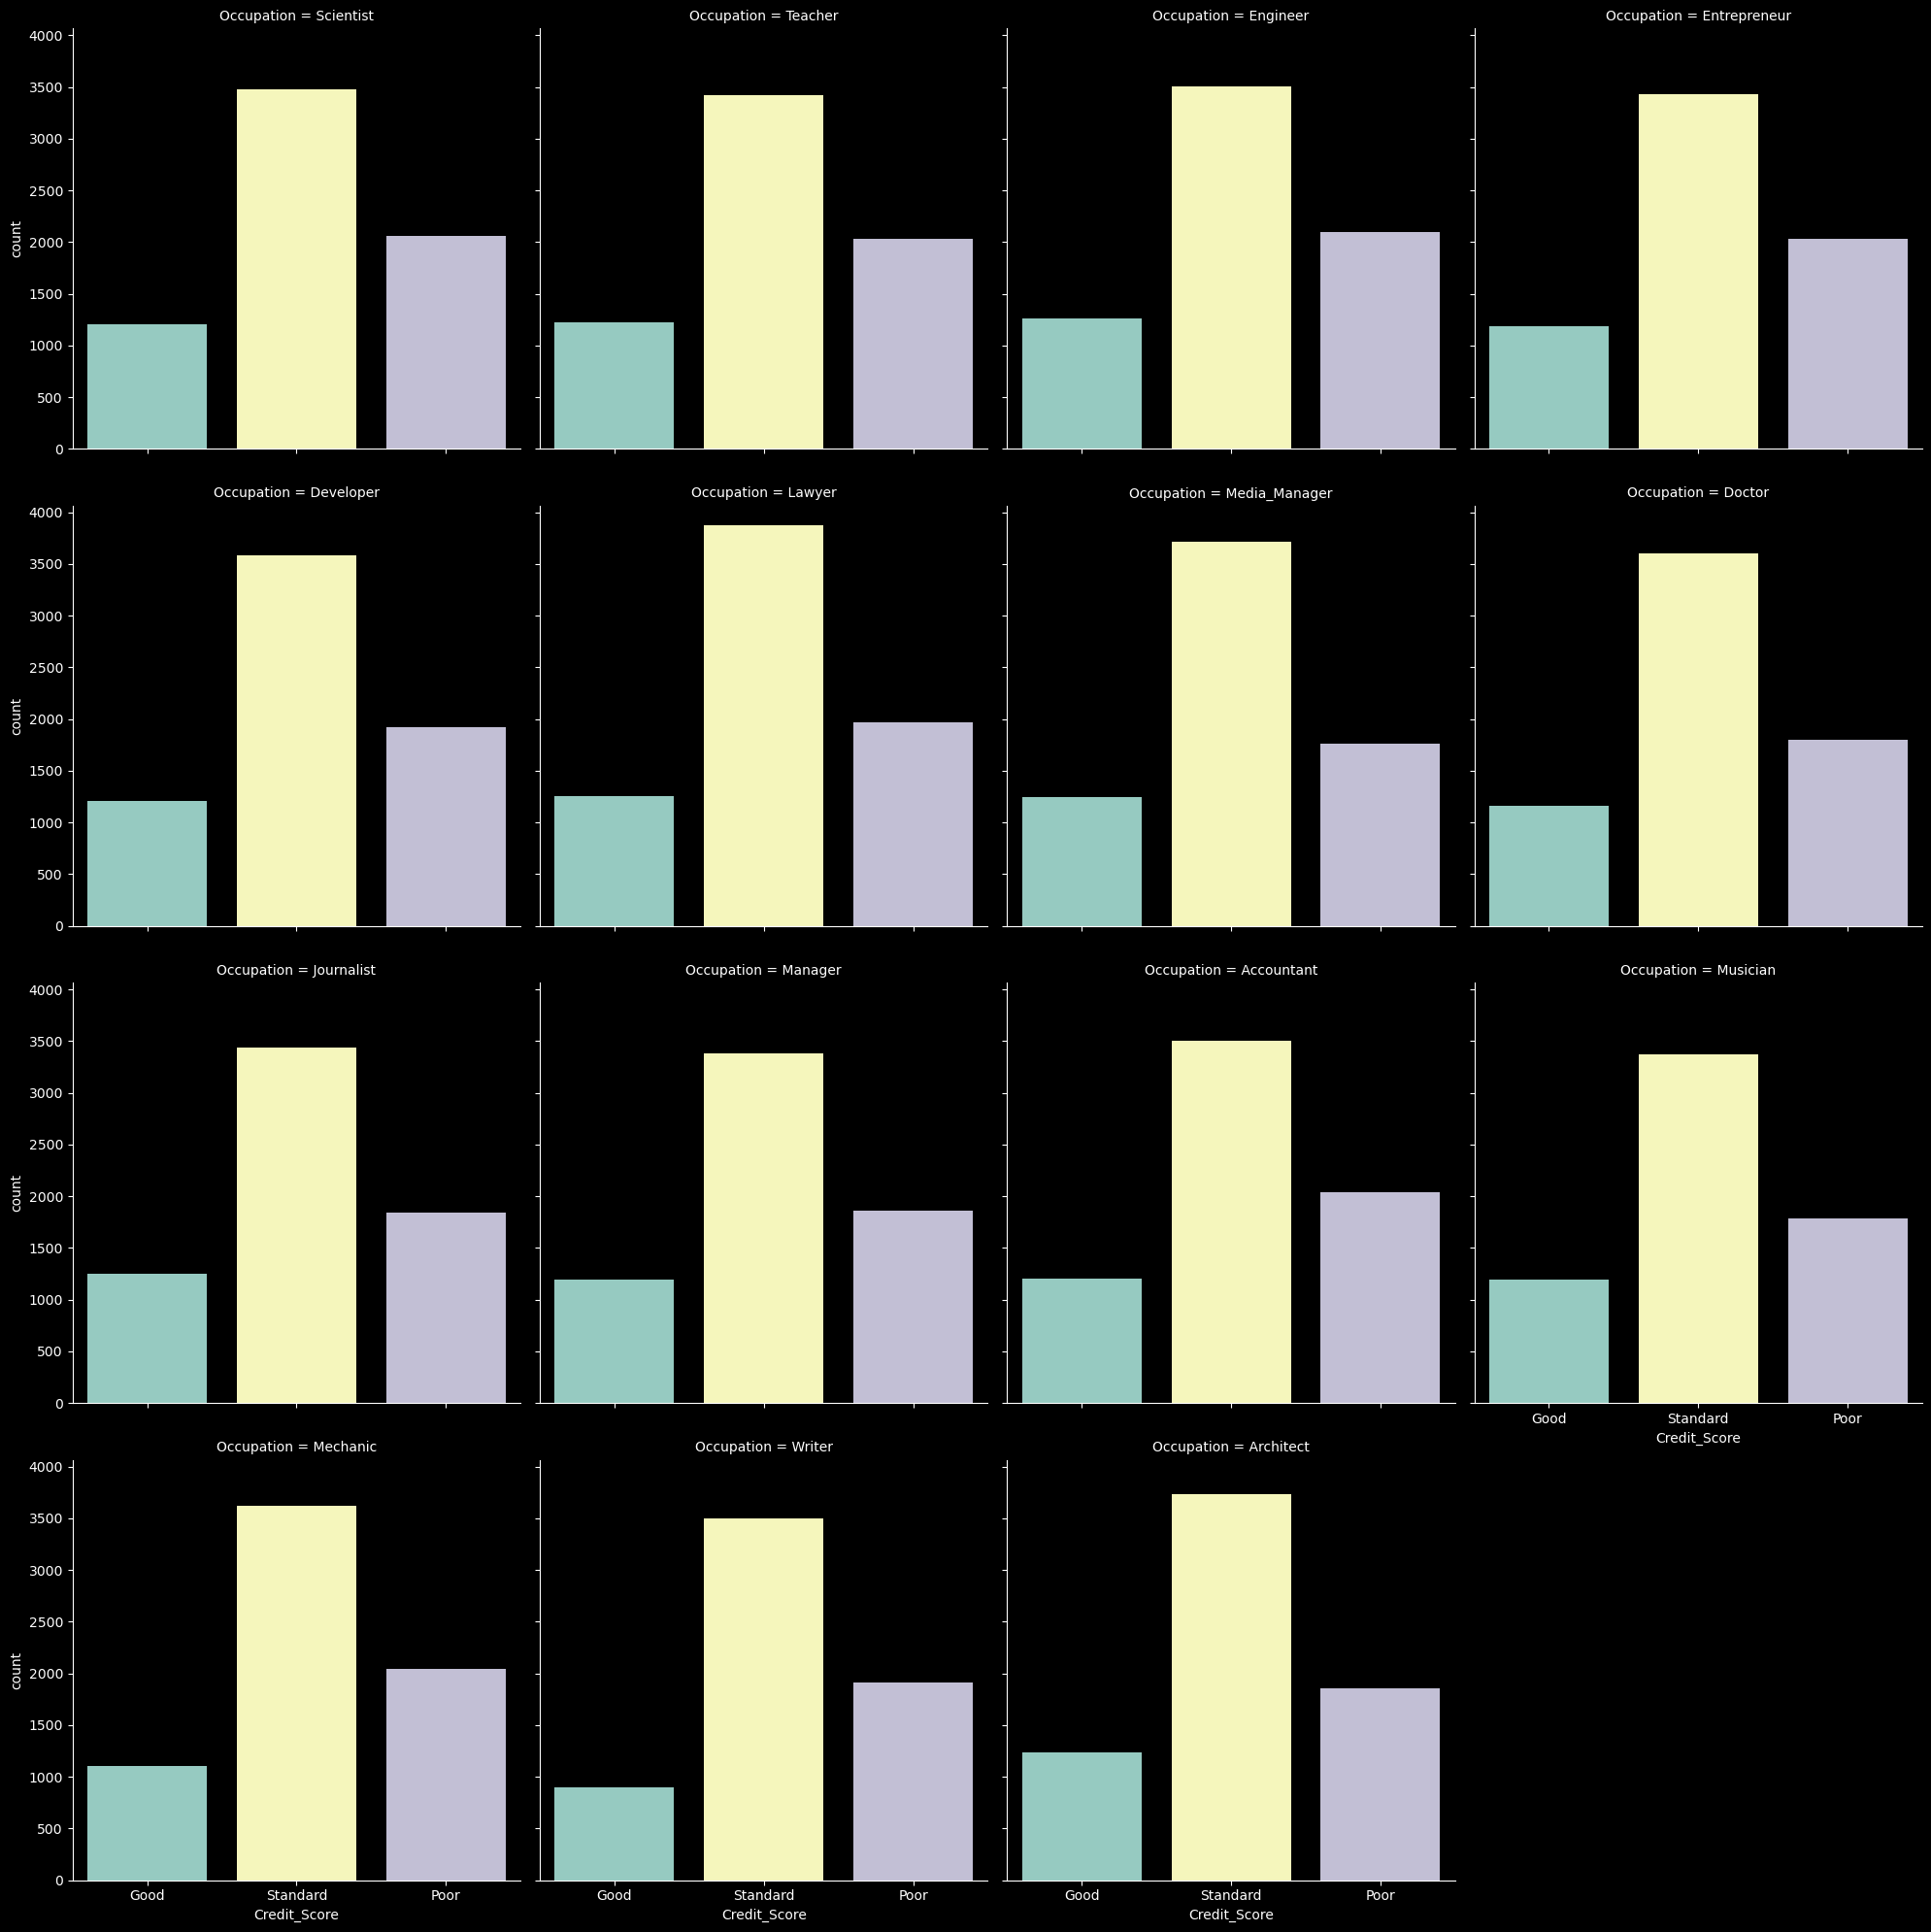

In [56]:
sns.catplot(x='Credit_Score', col='Occupation', data=df, kind='count', col_wrap=4)

In [57]:
df['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [58]:
# Set lower and upper limits
lower_limit = 0
upper_limit = 15

# Replace values outside the range with np.nan
df['Num_Credit_Card'] = df['Num_Credit_Card'].apply(lambda x: x if lower_limit <= x <= upper_limit else np.nan)

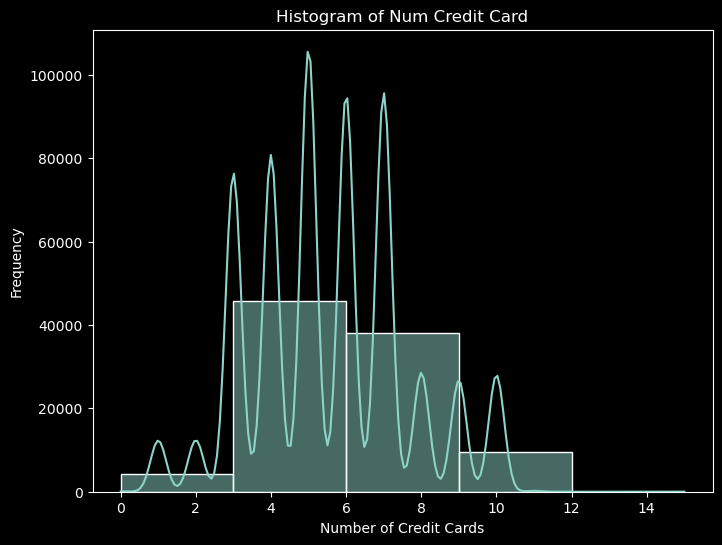

In [59]:
plt.style.use('dark_background')
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(data=df, x='Num_Credit_Card', bins=5, kde=True)
plt.title('Histogram of Num Credit Card')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Frequency')
plt.show()

Since Mean and Median are both the same it means that data is normally distributed so we can impute nulls by mean

In [60]:
Num_Credit_Card_mapping = {}
for index, row in df.iterrows():
    if pd.notnull(row['Num_Credit_Card']):
        Num_Credit_Card_mapping[row['Customer_ID']] = row['Num_Credit_Card']

# Fill missing age values using the age_mapping dictionary
for index, row in df.iterrows():
    if pd.isnull(row['Num_Credit_Card']):
        if row['Customer_ID'] in Num_Credit_Card_mapping:
            df.at[index, 'Num_Credit_Card'] = Num_Credit_Card_mapping[row['Customer_ID']]
        else:
            print(f"Warning: Num_Credit_Card found for customer_id {row['Customer_ID']}")

In [61]:
# Calculate the median of the Monthly_Inhand_Salary column
#mean_Num_Credit_Card = df['Num_Credit_Card'].mean()

# Impute null values in Monthly_Inhand_Salary column with the mean
#df['Num_Credit_Card'] = df['Num_Credit_Card'].fillna(mean_Num_Credit_Card)

In [62]:
df['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

In [63]:
# Set lower and upper limits
#lower_limit = 0
#upper_limit = 25

# Replace values outside the range with np.nan
#df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x: x if lower_limit <= x <= upper_limit else np.nan)

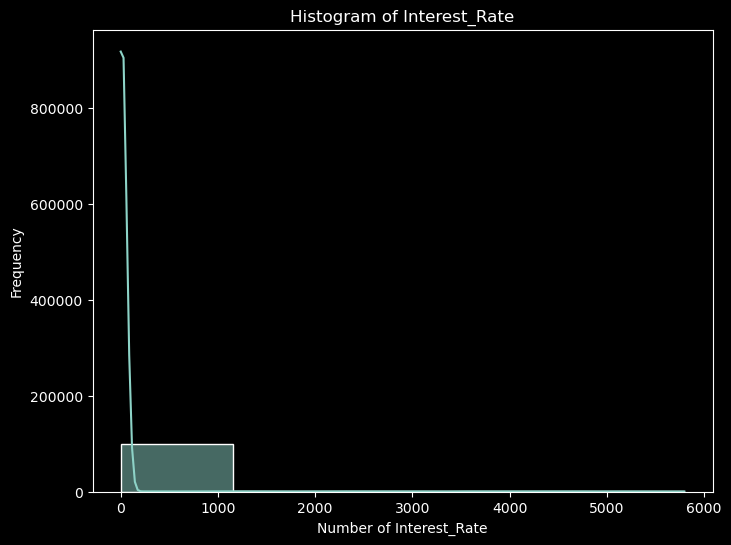

In [64]:
plt.style.use('dark_background')
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(data=df, x='Interest_Rate', bins=5, kde=True)
plt.title('Histogram of Interest_Rate')
plt.xlabel('Number of Interest_Rate')
plt.ylabel('Frequency')
plt.show()

Since Mean and Median are both the same it means that data is normally distributed so we can impute nulls by mean

In [65]:
# Calculate the median of the Monthly_Inhand_Salary column
#mean_Interest_Rate = df['Interest_Rate'].mean()

# Impute null values in Monthly_Inhand_Salary column with the mean
#df['Interest_Rate'] = df['Interest_Rate'].fillna(mean_Interest_Rate)

In [66]:
df['Num_of_Loan'].describe()

count    95061.000000
mean       110.934505
std        689.407864
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Num_of_Loan, dtype: float64

In [67]:
# Set lower and upper limits
lower_limit = 0
upper_limit = 50

# Replace values outside the range with np.nan
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: x if lower_limit <= x <= upper_limit else np.nan)

In [68]:
df['Num_of_Loan'].describe()

count    85688.000000
mean        31.766793
std          9.577677
min         14.000000
25%         24.000000
50%         32.000000
75%         40.000000
max         50.000000
Name: Num_of_Loan, dtype: float64

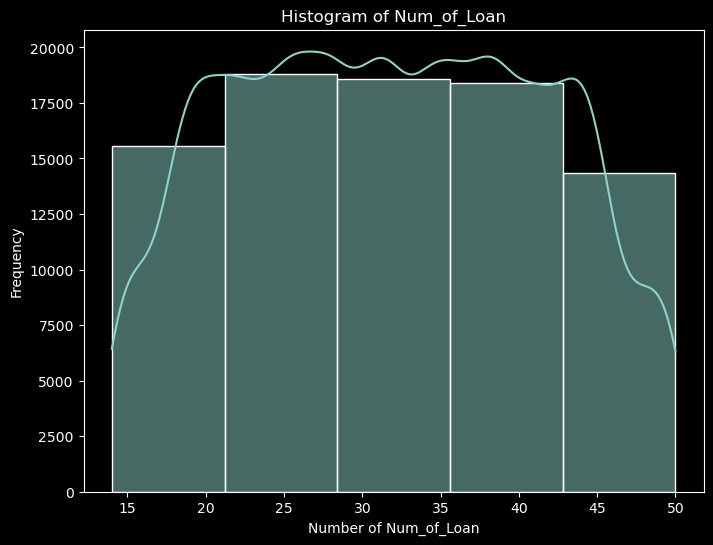

In [69]:
plt.style.use('dark_background')
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(data=df, x='Num_of_Loan', bins=5, kde=True)
plt.title('Histogram of Num_of_Loan')
plt.xlabel('Number of Num_of_Loan')
plt.ylabel('Frequency')
plt.show()

Since Mean and Median are both the same it means that data is normally distributed so we can impute nulls by mean

In [70]:
Num_of_Loan_mapping = {}
for index, row in df.iterrows():
    if pd.notnull(row['Num_of_Loan']):
        Num_of_Loan_mapping[row['Customer_ID']] = row['Num_of_Loan']

# Fill missing age values using the age_mapping dictionary
for index, row in df.iterrows():
    if pd.isnull(row['Num_of_Loan']):
        if row['Customer_ID'] in Num_of_Loan_mapping:
            df.at[index, 'Num_of_Loan'] = Num_of_Loan_mapping[row['Customer_ID']]
        else:
            print(f"Warning: Num_of_Loan found for customer_id {row['Customer_ID']}")

In [71]:
# Calculate the median of the Monthly_Inhand_Salary column
#mean_Num_of_Loan = df['Num_of_Loan'].mean()

# Impute null values in Monthly_Inhand_Salary column with the mean
#df['Num_of_Loan'] = df['Num_of_Loan'].fillna(mean_Num_of_Loan)

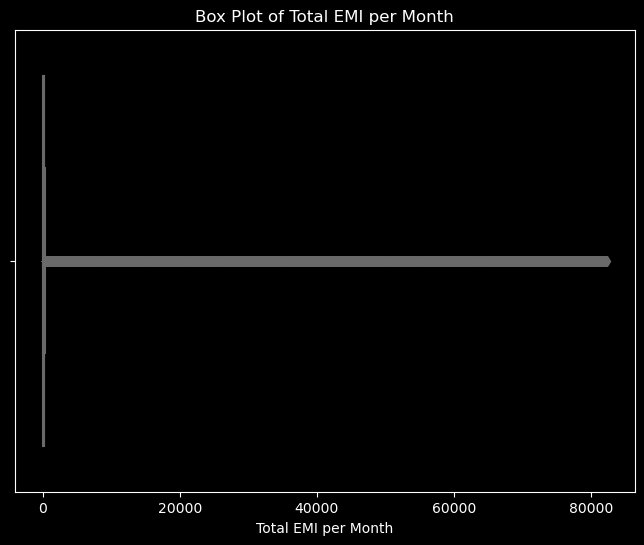

In [72]:
plt.style.use('dark_background')

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df['Total_EMI_per_month'])
plt.title('Box Plot of Total EMI per Month')
plt.xlabel('Total EMI per Month')
plt.show()

In [73]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [74]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

In [75]:
df['Credit_Mix'].isnull().sum()

20195

In [76]:
credit_mix__mapping = {}
for index, row in df.iterrows():
    if pd.notnull(row['Credit_Mix']):
        credit_mix__mapping[row['Customer_ID']] = row['Credit_Mix']

# Fill missing age values using the age_mapping dictionary
for index, row in df.iterrows():
    if pd.isnull(row['Credit_Mix']):
        if row['Customer_ID'] in credit_mix__mapping:
            df.at[index, 'Credit_Mix'] = credit_mix__mapping[row['Customer_ID']]
        else:
            print(f"Warning: No Credit_Mix found for customer_id {row['Customer_ID']}")

In [77]:
df['Credit_Mix'].isnull().sum()

0

In [78]:
df['Delay_from_due_date'].describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

In [79]:
# Set lower and upper limits
lower_limit = 0
upper_limit = 67

# Replace values outside the range with np.nan
df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(lambda x: x if lower_limit <= x <= upper_limit else np.nan)

In [80]:
df['Delay_from_due_date'].isnull().sum()

591

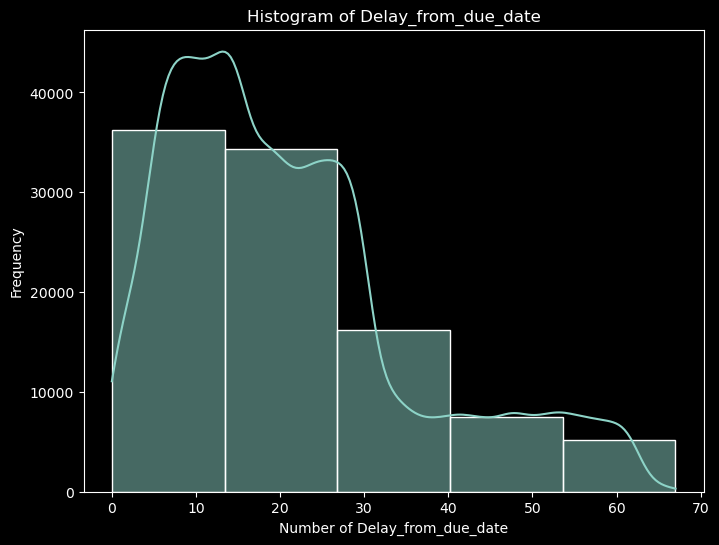

In [81]:
plt.style.use('dark_background')
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(data=df, x='Delay_from_due_date', bins=5, kde=True)
plt.title('Histogram of Delay_from_due_date')
plt.xlabel('Number of Delay_from_due_date')
plt.ylabel('Frequency')
plt.show()

The rest of the null values are 5k or less so we are gonna just drop the null values

In [82]:
df = df.dropna()

In [83]:
df.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Outlier Treatment

In [84]:
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.15)
    Q3 = df[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

In [85]:
# Create a dictionary to store the number of outliers for each column
outliers_count = {}

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Count outliers for each numerical column
for col in numerical_columns:
    outliers_count[col] = count_outliers_iqr(df, col)

# Print the number of outliers for each column
for col, count in outliers_count.items():
    print(f'Number of outliers in {col}: {count}')

Number of outliers in Age: 0
Number of outliers in Annual_Income: 746
Number of outliers in Monthly_Inhand_Salary: 0
Number of outliers in Num_Bank_Accounts: 957
Number of outliers in Num_Credit_Card: 0
Number of outliers in Interest_Rate: 1479
Number of outliers in Num_of_Loan: 0
Number of outliers in Delay_from_due_date: 0
Number of outliers in Num_of_Delayed_Payment: 527
Number of outliers in Changed_Credit_Limit: 0
Number of outliers in Num_Credit_Inquiries: 1213
Number of outliers in Outstanding_Debt: 0
Number of outliers in Credit_Utilization_Ratio: 0
Number of outliers in Total_EMI_per_month: 2996
Number of outliers in Amount_invested_monthly: 1750
Number of outliers in Monthly_Balance: 836


In [86]:
lower_percentile = df['Num_Credit_Inquiries'].quantile(0.05)
upper_percentile = df['Num_Credit_Inquiries'].quantile(0.95)

# Filter the DataFrame to remove outliers
df = df[(df['Num_Credit_Inquiries'] >= lower_percentile) & (df['Num_Credit_Inquiries'] <= upper_percentile)]


In [87]:
lower_percentile = df['Total_EMI_per_month'].quantile(0.05)
upper_percentile = df['Total_EMI_per_month'].quantile(0.95)

# Filter the DataFrame to remove outliers
df = df[(df['Total_EMI_per_month'] >= lower_percentile) & (df['Total_EMI_per_month'] <= upper_percentile)]

In [88]:
lower_percentile = df['Amount_invested_monthly'].quantile(0.05)
upper_percentile = df['Amount_invested_monthly'].quantile(0.95)

# Filter the DataFrame to remove outliers
df = df[(df['Amount_invested_monthly'] >= lower_percentile) & (df['Amount_invested_monthly'] <= upper_percentile)]

In [89]:
df.shape

(56122, 23)

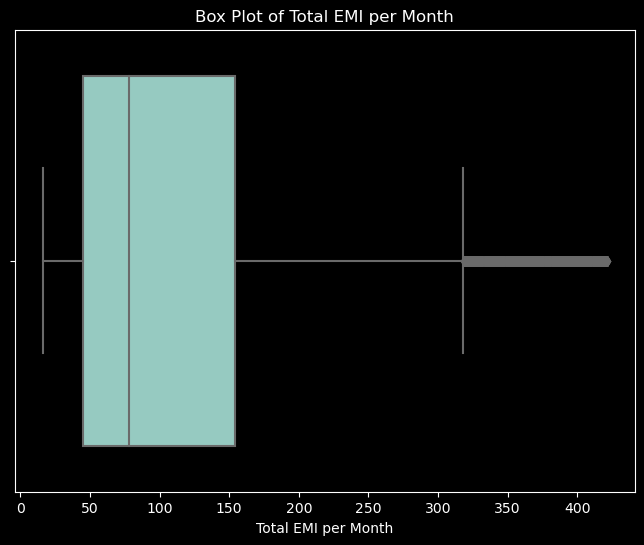

In [90]:
plt.style.use('dark_background')

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df['Total_EMI_per_month'])
plt.title('Box Plot of Total EMI per Month')
plt.xlabel('Total EMI per Month')
plt.show()

In [91]:
df.columns.tolist()

['Customer_ID',
 'Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_Score']

Data Transformation

In [92]:
print(df.head())

  Customer_ID    Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0   CUS_0xd40  January  23.0  Scientist       19114.12            1824.843333   
3   CUS_0xd40    April  23.0  Scientist       19114.12              23.000000   
4   CUS_0xd40      May  23.0  Scientist       19114.12            1824.843333   
5   CUS_0xd40     June  23.0  Scientist       19114.12              23.000000   
6   CUS_0xd40     July  23.0  Scientist       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  ...  \
0                  3              4.0              3         23.0  ...   
3                  3              4.0              3         23.0  ...   
4                  3              4.0              3         23.0  ...   
5                  3              4.0              3         23.0  ...   
6                  3              4.0              3         23.0  ...   

  Changed_Credit_Limit  Num_Credit_Inquiries  Credit_Mix  Outstandin

In [93]:
df.drop('Type_of_Loan' , axis = 1 , inplace = True)

In [94]:
df.drop('Customer_ID' , axis = 1 , inplace = True)

In [95]:
object_columns = df.select_dtypes(include=['object'])

# Display the selected columns
object_columns.columns.to_list()

['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score']

In [96]:
print(object_columns.head(9))

       Month Occupation Credit_Mix Payment_of_Min_Amount Credit_Score
0    January  Scientist       Good                    No         Good
3      April  Scientist       Good                    No         Good
4        May  Scientist       Good                    No         Good
5       June  Scientist       Good                    No         Good
6       July  Scientist       Good                    No         Good
8    January    Teacher       Good                    No     Standard
9   February    Teacher       Good                    No         Good
10     March    Teacher       Good                    No     Standard
11     April    Teacher       Good                    No         Good


In [97]:
df['Month'].value_counts()

Month
January     7344
March       7181
February    7177
April       7111
May         6944
June        6939
July        6764
August      6662
Name: count, dtype: int64

In [98]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    31969
No     17346
NM      6807
Name: count, dtype: int64

In [99]:
df = pd.get_dummies(df, columns=['Month','Occupation', 'Payment_of_Min_Amount'])

# Display the encoded DataFrame
df = df.replace({False: 0, True: 1})
print(df)

        Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      23.0       19114.12            1824.843333                  3   
3      23.0       19114.12              23.000000                  3   
4      23.0       19114.12            1824.843333                  3   
5      23.0       19114.12              23.000000                  3   
6      23.0       19114.12            1824.843333                  3   
...     ...            ...                    ...                ...   
99994  25.0       39628.99            3359.415833                  4   
99995  25.0       39628.99            3359.415833                  4   
99996  25.0       39628.99            3359.415833                  4   
99998  25.0       39628.99            3359.415833                  4   
99999  25.0       39628.99            3359.415833                  4   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                  4.0              3         23.0          

In [100]:
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,23.0,19114.12,1824.843333,3,4.0,3,23.0,3.0,7.0,11.27,...,0,0,0,0,1,0,0,0,1,0
3,23.0,19114.12,23.000000,3,4.0,3,23.0,5.0,4.0,6.27,...,0,0,0,0,1,0,0,0,1,0
4,23.0,19114.12,1824.843333,3,4.0,3,23.0,6.0,0.0,11.27,...,0,0,0,0,1,0,0,0,1,0
5,23.0,19114.12,23.000000,3,4.0,3,23.0,8.0,4.0,9.27,...,0,0,0,0,1,0,0,0,1,0
6,23.0,19114.12,1824.843333,3,4.0,3,23.0,3.0,0.0,11.27,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,39628.99,3359.415833,4,6.0,7,25.0,20.0,6.0,9.50,...,0,1,0,0,0,0,0,0,1,0
99995,25.0,39628.99,3359.415833,4,6.0,7,25.0,23.0,7.0,11.50,...,0,1,0,0,0,0,0,0,1,0
99996,25.0,39628.99,3359.415833,4,6.0,7,25.0,18.0,7.0,11.50,...,0,1,0,0,0,0,0,0,1,0
99998,25.0,39628.99,3359.415833,4,6.0,7,25.0,20.0,0.0,11.50,...,0,1,0,0,0,0,0,0,1,0


In [101]:

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Credit_Mix' and 'Credit_Score' columns
df['Credit_Mix_Encoded'] = label_encoder.fit_transform(df['Credit_Mix'])

# Define mapping for Credit_Mix
credit_mix_mapping = {'Bad': 0, 'Standard': 1, 'Good': 2}
df['Credit_Mix_Mapped'] = df['Credit_Mix'].map(credit_mix_mapping)



In [102]:
from sklearn.preprocessing import LabelEncoder

# Define mapping for Credit_Score
credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

# Map Credit_Score using the defined mapping, keeping 0 as integer 0
df['Credit_Score_Mapped'] = df['Credit_Score'].apply(lambda x: credit_score_mapping.get(x, x))

# Display the DataFrame with mapped column
print(df)

        Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      23.0       19114.12            1824.843333                  3   
3      23.0       19114.12              23.000000                  3   
4      23.0       19114.12            1824.843333                  3   
5      23.0       19114.12              23.000000                  3   
6      23.0       19114.12            1824.843333                  3   
...     ...            ...                    ...                ...   
99994  25.0       39628.99            3359.415833                  4   
99995  25.0       39628.99            3359.415833                  4   
99996  25.0       39628.99            3359.415833                  4   
99998  25.0       39628.99            3359.415833                  4   
99999  25.0       39628.99            3359.415833                  4   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                  4.0              3         23.0          

In [103]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    29734
Poor        18029
Good         8359
Name: count, dtype: int64

In [104]:
df['Credit_Score_Mapped'].value_counts()

Credit_Score_Mapped
1    29734
0    18029
2     8359
Name: count, dtype: int64

In [105]:
df.drop('Credit_Mix' , axis = 1 , inplace = True)
df.drop('Credit_Score', axis = 1 , inplace = True)

In [106]:
numerical_columns.to_list()

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

<Figure size 1500x1000 with 0 Axes>

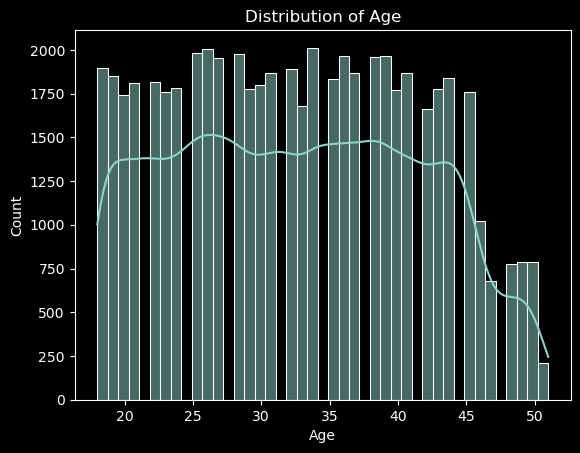

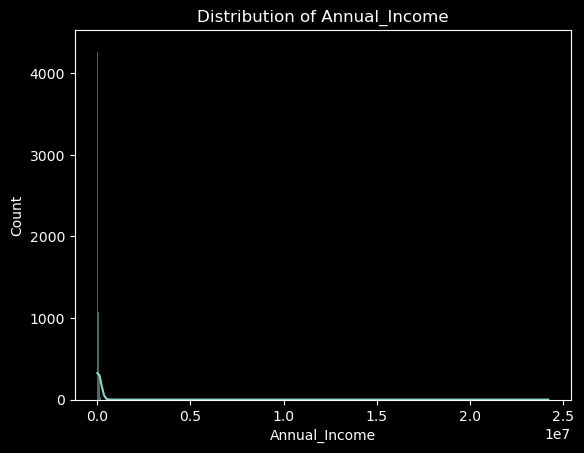

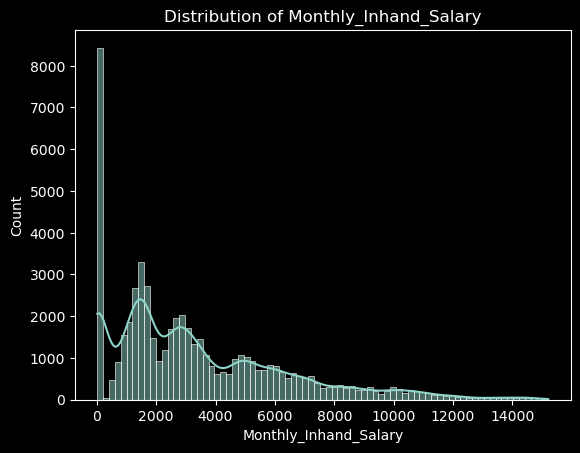

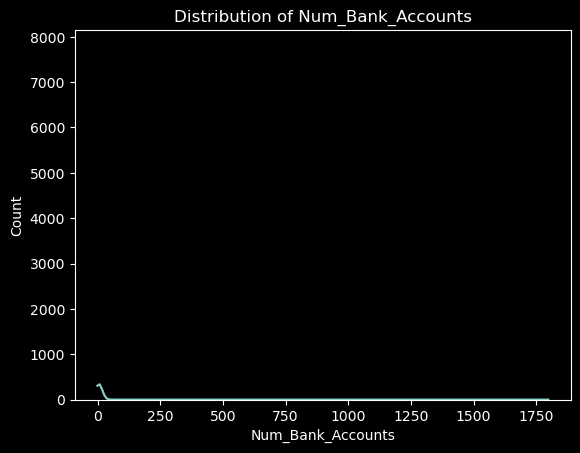

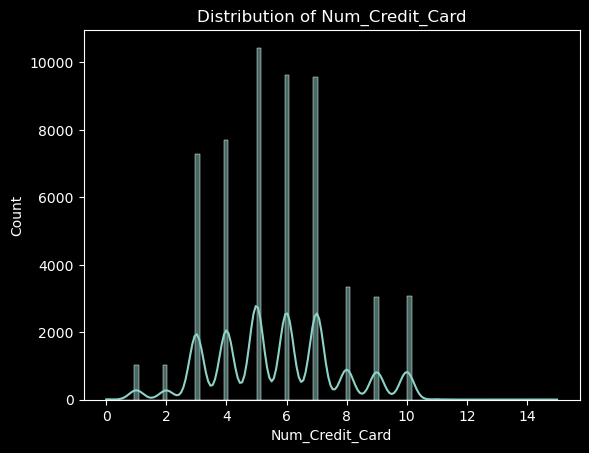

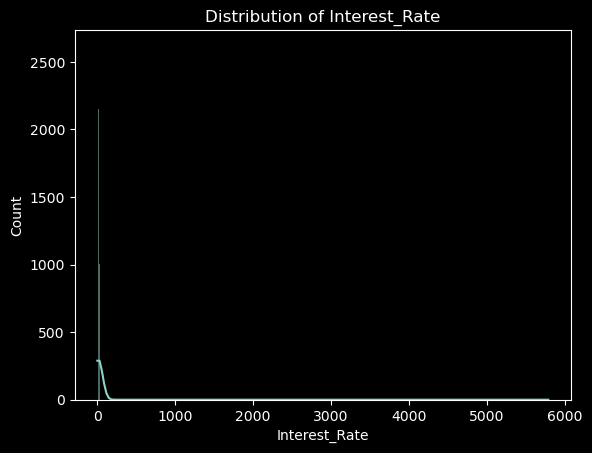

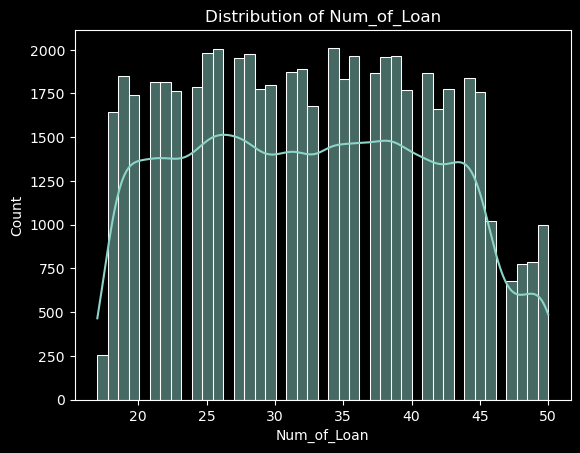

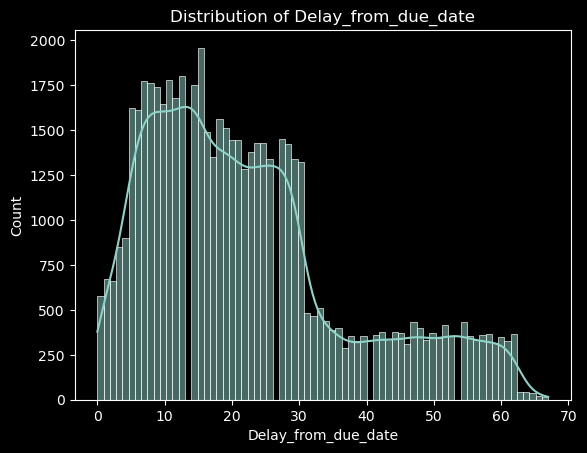

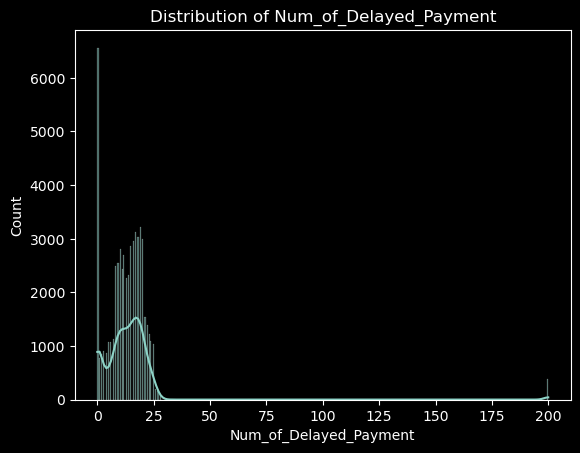

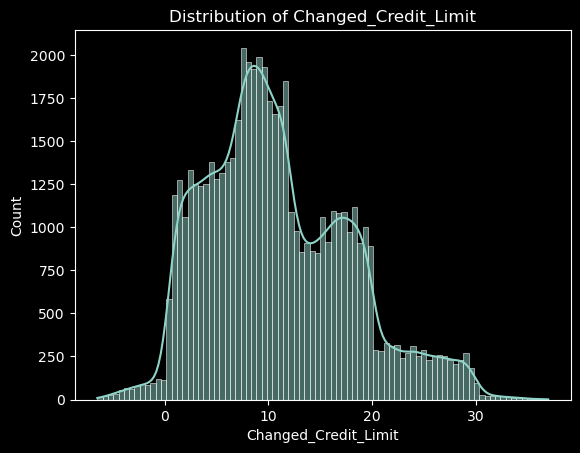

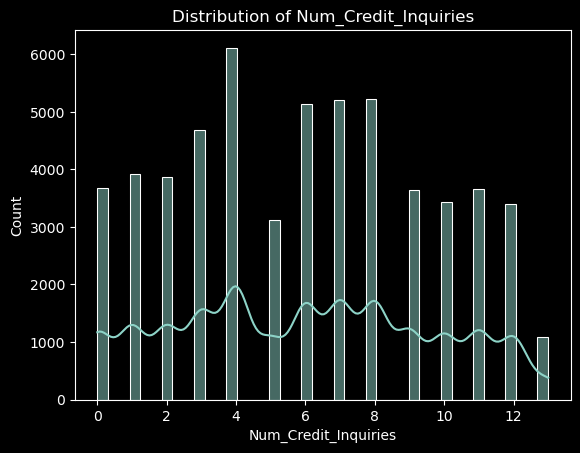

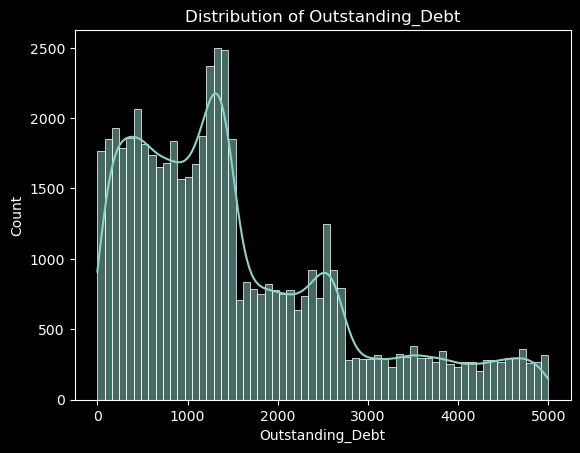

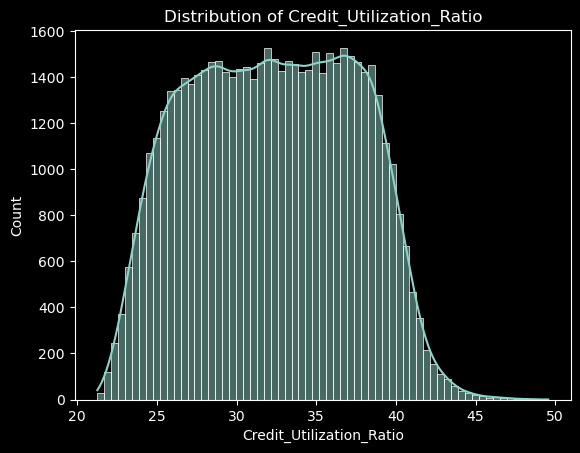

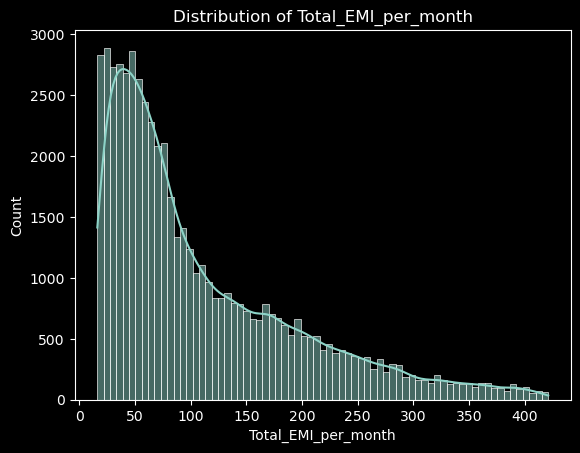

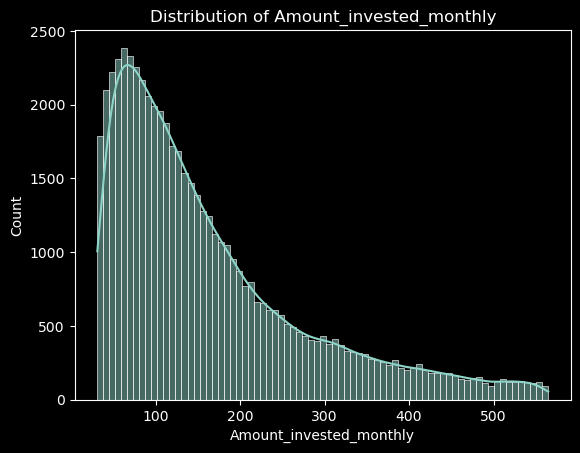

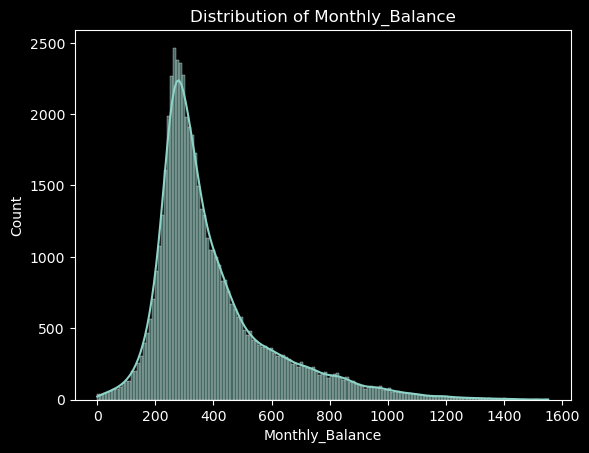

In [107]:
# Set the size of the plots
plt.figure(figsize=(15, 10))

# Loop through the numerical variables and create distplots
for var in numerical_columns:
    plt.figure()
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

Normal : Age , Num_of_Credit_Card, Credit_Utilization_Ratio (Standardization)

Skewed : Annual_Income , Monthly_Balance , Amount_invested_monthly , Total_EMI_per_month , Num_of_Delayed_Payment , Outstanding_Debt (Normalization)

In [108]:

from sklearn.preprocessing import MinMaxScaler


# List of columns to be scaled
columns_to_scale = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance'
]

# Verify if all columns exist in the DataFrame
missing_columns = [col for col in columns_to_scale if col not in df.columns]
if missing_columns:
    print(f"Warning: The following columns are missing and will be skipped: {missing_columns}")

# Filter out the missing columns
columns_to_scale = [col for col in columns_to_scale if col in df.columns]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the DataFrame with scaled values
print(df)


            Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      0.151515       0.000501               0.118976           0.002223   
3      0.151515       0.000501               0.000329           0.002223   
4      0.151515       0.000501               0.118976           0.002223   
5      0.151515       0.000501               0.000329           0.002223   
6      0.151515       0.000501               0.118976           0.002223   
...         ...            ...                    ...                ...   
99994  0.212121       0.001349               0.220023           0.002779   
99995  0.212121       0.001349               0.220023           0.002779   
99996  0.212121       0.001349               0.220023           0.002779   
99998  0.212121       0.001349               0.220023           0.002779   
99999  0.212121       0.001349               0.220023           0.002779   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0           

Train and Test

Keep: Significant features (p-value ≤ 0.05)

Consider Removing: Non-significant features (p-value > 0.05), especially if you are aiming to simplify the model.

OLS (Ordinary Least Squares) regression is typically used for continuous target variables, not categorical variables with multiple classes. For categorical variables with three or more classes, you would generally use multinomial logistic regression (also known as softmax regression for multiclass classification).

In [109]:
# Prepare the features (X) and target (y)
X = df.drop('Credit_Score_Mapped', axis=1)
y = df['Credit_Score_Mapped']

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model using classification metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.54      0.59      5409
           1       0.69      0.72      0.71      8886
           2       0.55      0.66      0.60      2542

    accuracy                           0.66     16837
   macro avg       0.63      0.64      0.63     16837
weighted avg       0.66      0.66      0.65     16837

[[2941 2099  369]
 [1461 6420 1005]
 [  85  781 1676]]


c:\Users\keena\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


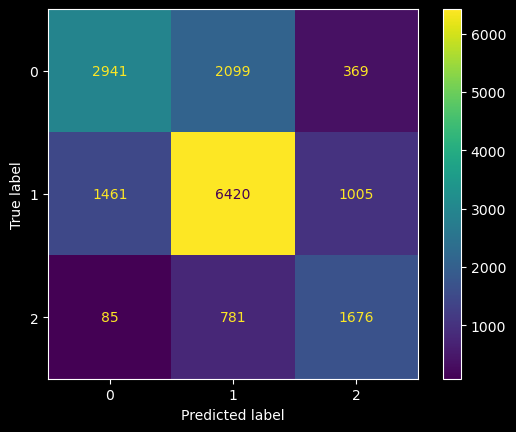

In [111]:
from sklearn.metrics import  ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [112]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6555205796757142
